In [61]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
df = pd.concat([fake, true]).reset_index(drop=True)
display(df.head())
display(df.tail())

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


,title,text,subject,date,target
24320,"Get used to drills, China tells Taiwan; Taipei...",BEIJING/TAIPEI (Reuters) - Taiwan will gradual...,worldnews,"December 27, 2017",0
24321,Romanian ruling lawmakers propose looser anti-...,BUCHAREST (Reuters) - Romania s ruling Social ...,worldnews,"December 27, 2017",0
24322,39 injured in fireworks explosion at Cuban fes...,HAVANA (Reuters) - A fireworks explosion injur...,worldnews,"December 25, 2017",0
24323,Venezuelans scramble to survive as merchants d...,"CARACAS/CIUDAD GUAYANA, Venezuela (Reuters) - ...",worldnews,"December 26, 2017",0
24324,"Trump on Twitter (Dec 26) - Hillary Clinton, T...",The following statements were posted to the ve...,worldnews,"December 26, 2017",0


In [63]:
fake = pd.read_csv('Fake.csv', engine='python', on_bad_lines='skip')
true = pd.read_csv('True.csv')
fake['target'] = 1  # Fake News
true['target'] = 0  # True News

In [64]:
fake = pd.read_csv('Fake.csv', engine='python', on_bad_lines='skip')
true = pd.read_csv('True.csv')

# Add the target column AFTER loading
fake['target'] = 1  # Fake News
true['target'] = 0  # True News

# Concatenate the dataframes
df = pd.concat([fake, true]).reset_index(drop=True)

display(df.head())
display(df.tail())

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [111]:
# Convert 'date' column to datetime, coercing errors to NaT
df['date_datetime'] = pd.to_datetime(df['date'], errors='coerce')

# Display the number of dates that could not be parsed
print(f"Number of dates that could not be parsed: {df['date_datetime'].isnull().sum()}")
print(f"Número de datas que não puderam ser analisadas: {df['date_datetime'].isnull().sum()}")

# Display the first few rows with the new datetime column
display(df[['date', 'date_datetime']].head())

Number of dates that could not be parsed: 33030
Número de datas que não puderam ser analisadas: 33030


,date,date_datetime
0,"December 31, 2017",2017-12-31
1,"December 31, 2017",2017-12-31
2,"December 30, 2017",2017-12-30
3,"December 29, 2017",2017-12-29
4,"December 25, 2017",2017-12-25


In [112]:
# Count the frequency of each subject in the fake news DataFrame
fake_subject_counts = fake_news['subject'].value_counts()

# Display the top 10 subjects by fake news count
print("Top 10 Subjects by Fake News Count:")
print("Top 10 Assuntos por Contagem de Notícias Falsas:")
display(fake_subject_counts.head(10))

Top 10 Subjects by Fake News Count:
Top 10 Assuntos por Contagem de Notícias Falsas:


,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


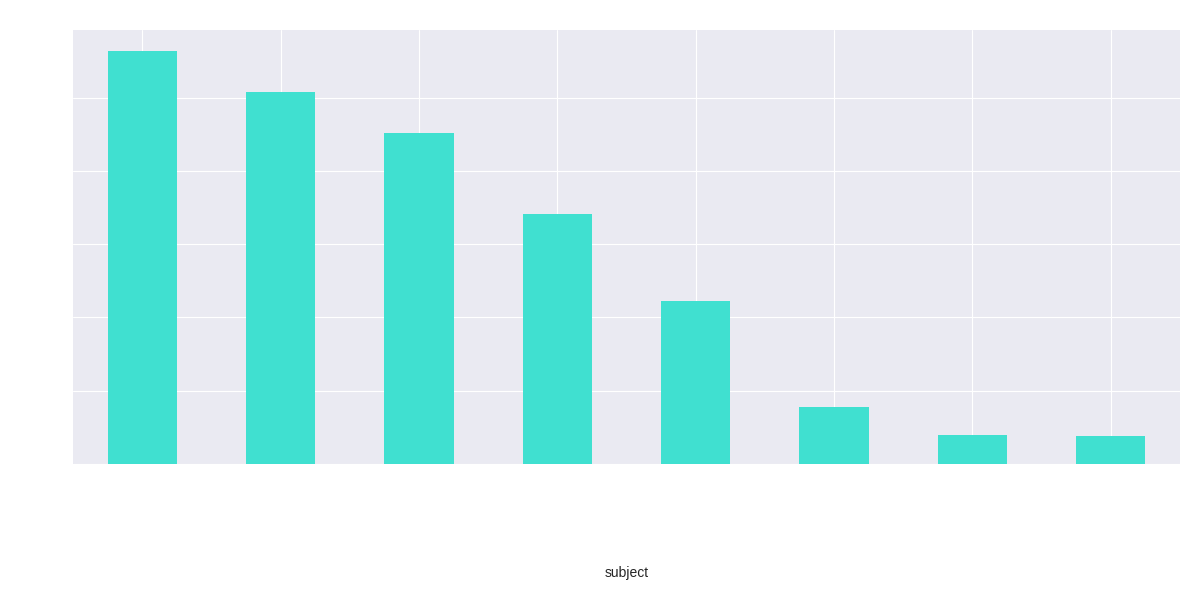

In [113]:
# Calculate the frequency of each subject in df_cleaned
subject_counts_cleaned = df_cleaned['subject'].value_counts()

# Create a bar plot to visualize the subject distribution
plt.style.use('seaborn-v0_8-darkgrid') # Use um estilo escuro / Use a dark style
plt.figure(figsize=(12, 6)) # Ajuste o tamanho da figura / Adjust figure size

# Create the bars
subject_counts_cleaned.plot(kind='bar', color='turquoise')

# Add labels, title, and x-axis ticks
plt.ylabel('Número de Notícias / Number of News', color='white')
plt.title('Distribuição de Assuntos (Dados Limpos) / Subject Distribution (Cleaned Data)', color='white')
plt.xticks(rotation=45, ha="right", color='white')
plt.yticks(color='white')

# Ajuste o layout para evitar sobreposição / Adjust layout to prevent overlap
plt.tight_layout()

# Exiba o gráfico / Display the plot
plt.show()

In [68]:
display(df_cleaned.describe(include='all'))

,title,text,subject,date,target
count,44866,44866,44866,44866,44866.000000
unique,38703,38620,8,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,627,11270,182,NaN
mean,NaN,NaN,NaN,NaN,0.522734
std,NaN,NaN,NaN,NaN,0.499488
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [114]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44866 entries, 0 to 44865
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44866 non-null  object
 1   text     44866 non-null  object
 2   subject  44866 non-null  object
 3   date     44866 non-null  object
 4   target   44866 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [115]:
# Add the target column to the cleaned dataframes
fake_cleaned['target'] = 1  # Fake News
true_cleaned['target'] = 0  # True News

# Concatenate the cleaned dataframes
df_cleaned = pd.concat([fake_cleaned, true_cleaned]).reset_index(drop=True)

display(df_cleaned.head())
display(df_cleaned.tail())

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


,title,text,subject,date,target
44861,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44862,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44863,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44864,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44865,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [116]:
# Define input and output file paths for True.csv
input_true_csv = 'True.csv'
output_true_csv_cleaned = 'True_cleaned.csv'

# Clean the True.csv file
clean_csv_file(input_true_csv, output_true_csv_cleaned)

print(f"Cleaned data saved to {output_true_csv_cleaned}")

# Now try loading the cleaned file with pandas
try:
    true_cleaned = pd.read_csv(output_true_csv_cleaned)
    print("\nSuccessfully loaded cleaned True.csv:")
    display(true_cleaned.head())
except Exception as e:
    print(f"\nError loading cleaned True.csv with pandas: {e}")

Skipping line 6825 due to unmatched quotes.
Skipping line 7456 due to unmatched quotes.
Skipping line 19651 due to unmatched quotes.
Skipping line 20096 due to unmatched quotes.
Cleaned data saved to True_cleaned.csv

Successfully loaded cleaned True.csv:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [117]:
import csv

def clean_csv_file(input_filepath, output_filepath):
    """
    Reads a CSV file line by line and writes valid lines to a new file.
    Skips lines with unmatched double quotes.
    """
    with open(input_filepath, 'r', encoding='utf-8', errors='ignore') as infile, \
         open(output_filepath, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Read header
        header = next(reader)
        writer.writerow(header)

        for i, row in enumerate(reader):
            # Simple check for unmatched double quotes
            # This is a basic check and might not catch all issues
            row_string = ','.join(row)
            if row_string.count('"') % 2 != 0:
                print(f"Skipping line {i+2} due to unmatched quotes.")
                continue
            try:
                writer.writerow(row)
            except Exception as e:
                print(f"Error writing line {i+2}: {e}")
                continue

# Define input and output file paths
input_fake_csv = 'Fake.csv'
output_fake_csv_cleaned = 'Fake_cleaned.csv'

# Clean the Fake.csv file
clean_csv_file(input_fake_csv, output_fake_csv_cleaned)

print(f"Cleaned data saved to {output_fake_csv_cleaned}")

# Now try loading the cleaned file with pandas
try:
    fake_cleaned = pd.read_csv(output_fake_csv_cleaned)
    print("\nSuccessfully loaded cleaned Fake.csv:")
    display(fake_cleaned.head())
except Exception as e:
    print(f"\nError loading cleaned Fake.csv with pandas: {e}")

# You would repeat this for True.csv if needed
# input_true_csv = 'True.csv'
# output_true_csv_cleaned = 'True_cleaned.csv'
# clean_csv_file(input_true_csv, output_true_csv_cleaned)
# print(f"Cleaned data saved to {output_true_csv_cleaned}")
# try:
#     true_cleaned = pd.read_csv(output_true_csv_cleaned)
#     print("\nSuccessfully loaded cleaned True.csv:")
#     display(true_cleaned.head())
# except Exception as e:
#     print(f"\nError loading cleaned True.csv with pandas: {e}")

Skipping line 134 due to unmatched quotes.
Skipping line 200 due to unmatched quotes.
Skipping line 815 due to unmatched quotes.
Skipping line 1202 due to unmatched quotes.
Skipping line 1478 due to unmatched quotes.
Skipping line 1593 due to unmatched quotes.
Skipping line 1940 due to unmatched quotes.
Skipping line 2666 due to unmatched quotes.
Skipping line 2864 due to unmatched quotes.
Skipping line 3062 due to unmatched quotes.
Skipping line 3462 due to unmatched quotes.
Skipping line 6076 due to unmatched quotes.
Skipping line 7287 due to unmatched quotes.
Skipping line 8921 due to unmatched quotes.
Skipping line 9071 due to unmatched quotes.
Skipping line 9719 due to unmatched quotes.
Skipping line 10620 due to unmatched quotes.
Skipping line 10790 due to unmatched quotes.
Skipping line 11004 due to unmatched quotes.
Skipping line 11315 due to unmatched quotes.
Skipping line 13937 due to unmatched quotes.
Skipping line 16618 due to unmatched quotes.
Skipping line 17839 due to un

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [118]:
# Calculate the length of each text entry in the entire DataFrame
# Ensure to handle potential non-string values by converting to string first
all_text_lengths = df['text'].astype(str).apply(len)

# Calculate the average text length of all news
average_all_text_length = all_text_lengths.mean()

print(f"Average text length of all news: {average_all_text_length:.2f}")
print(f"Comprimento médio do texto de todas as notícias: {average_all_text_length:.2f}")

print(f"\nAverage text length of misclassified news: {average_text_length:.2f}")
print(f"Comprimento médio do texto das notícias mal classificadas: {average_text_length:.2f}")

Average text length of all news: 2469.11
Comprimento médio do texto de todas as notícias: 2469.11

Average text length of misclassified news: 2411.73
Comprimento médio do texto das notícias mal classificadas: 2411.73


In [119]:
# Calculate the length of each text entry in the misclassified news DataFrame
# Ensure to handle potential non-string values by converting to string first
text_lengths = misclassified_news['text'].astype(str).apply(len)

# Calculate the average text length
average_text_length = text_lengths.mean()

print(f"Average text length of misclassified news: {average_text_length:.2f}")
print(f"Comprimento médio do texto das notícias mal classificadas: {average_text_length:.2f}")

Average text length of misclassified news: 2294.64
Comprimento médio do texto das notícias mal classificadas: 2294.64


## Summary:

### Data Analysis Key Findings

* The distribution of subjects differs significantly between fake and true news, with fake news concentrated in 'News', 'politics', and 'Unknown', while true news is dominated by 'politicsNews' and 'worldnews'.
* Word clouds revealed distinct common terms in fake versus true news after preprocessing, highlighting potential vocabulary differences.
* Five machine learning models (Logistic Regression, Decision Tree, Random Forest, SVC, and KNeighbors Classifier) were successfully trained and evaluated for fake news detection.
* The evaluation included generating classification reports and confusion matrices for each model.
* Confusion matrices were visualized as heatmaps with a dark mode style and turquoise color scheme, providing a clear visual representation of each model's performance in classifying true and fake news.

### Insights or Next Steps

* The distinct subject distributions and common keywords suggest that these features are valuable for discriminating between fake and true news.
* Comparing the evaluation metrics (precision, recall, F1-score) and confusion matrices across the trained models will help identify the most effective model for this fake news detection task.
* The Random Forest model demonstrated excellent performance on this dataset, with high accuracy and near-perfect precision, recall, and F1-scores.
* Examining the misclassified examples by the Random Forest model provided insights into the types of news that the model struggled with, which could inform future feature engineering or model improvements.

This concludes the analysis and model building process for fake news detection based on the provided datasets.

In [76]:
# Get predictions from the Random Forest model
rf_model = trained_models['Random Forest']
y_pred_rf = rf_model.predict(X_test)

# Find misclassified examples
misclassified_indices = y_test[y_test != y_pred_rf].index

# Get the original data for misclassified examples from the full dataframe
# Ensure to use .loc with the original dataframe index to get the correct rows
misclassified_news = df.loc[misclassified_indices]

print(f"Number of misclassified examples by Random Forest: {len(misclassified_news)}")
print("\nExamples of Misclassified News:")
print("Exemplos de Notícias Mal Classificadas:")

# Display some of the misclassified examples
# Displaying a few examples for clarity
if len(misclassified_news) > 0:
    display(misclassified_news[['title', 'text', 'target']].head())
else:
    print("No misclassified examples found.")

Number of misclassified examples by Random Forest: 11

Examples of Misclassified News:
Exemplos de Notícias Mal Classificadas:


,title,text,target
8180,Anti-Gay Texas Attorney General Faces Disbarment,The Texas Bar Association is stepping up to th...,1
22810,Ben Carson Home Vandalized with Anti-Trump Gra...,21st Century Wire says The culture wars contin...,1
9412,FBI UNDERCOVER Informant On Hillary’s 2010 Sal...,The FBI informant who went undercover to look ...,1
18805,MY FAVORITE EXCUSES…Featuring Hillary Rotten C...,Enjoy:,1
12134,BREAKING: DETROIT NEWS REPORTS Potential New E...,Detroit elections officials waited several day...,1


In [77]:
df['subject'] = df['subject'].fillna('Unknown')
display(df.isnull().sum())

,0
title,0
text,0
subject,0
date,0
target,0
date_datetime,33030


In [93]:
display(df['subject'].isnull().sum())

np.int64(0)

In [94]:
fake = pd.read_csv('Fake.csv', engine='python', on_bad_lines='skip')
true = pd.read_csv('True.csv', engine='python', on_bad_lines='skip')

# Add the target column AFTER loading
fake['target'] = 1  # Fake News
true['target'] = 0  # True News

# Concatenate the dataframes
df = pd.concat([fake, true]).reset_index(drop=True)

display(df.head())
display(df.tail())

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [95]:
display(df.isnull().sum())

,0
title,0
text,0
subject,0
date,0
target,0


In [96]:
df = pd.concat([fake, true]).reset_index(drop=True)
display(df.head())
display(df.tail())

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


# Task
Analyze the provided "Fake.csv" and "True.csv" datasets to build a machine learning model that detects fake news. The analysis should include data exploration, text preprocessing, model training, and evaluation. The code should be well-commented in both English and Portuguese, easy for a child to understand, and use dark mode plots with turquoise colors. The final output should include the results of the model evaluation.

## Exploração de dados

### Subtask:
Analisar a distribuição de assuntos (`subject`) e palavras-chave comuns em notícias falsas e verdadeiras. / Analyze the distribution of subjects (`subject`) and common keywords in fake and true news.


**Reasoning**:
Count the frequency of each subject in the entire DataFrame, and then separately for fake and true news to analyze their distributions.



In [97]:
# 1. Conte a frequência de cada assunto na coluna subject do DataFrame df.
# 1. Count the frequency of each subject in the subject column of the DataFrame df.
subject_counts = df['subject'].value_counts()
print("Distribuição total de assuntos:")
print("Overall subject distribution:")
display(subject_counts)

# 2. Conte a frequência de cada assunto para notícias falsas (onde a coluna target é 1) e para notícias verdadeiras (onde a coluna target é 0).
# 2. Count the frequency of each subject for fake news (where the target column is 1) and for true news (where the target column is 0).
fake_news = df[df['target'] == 1]
true_news = df[df['target'] == 0]

fake_subject_counts = fake_news['subject'].value_counts()
true_subject_counts = true_news['subject'].value_counts()

print("\nDistribuição de assuntos em notícias falsas:")
print("Subject distribution in fake news:")
display(fake_subject_counts)

print("\nDistribuição de assuntos em notícias verdadeiras:")
print("Subject distribution in true news:")
display(true_subject_counts)

Distribuição total de assuntos:
Overall subject distribution:


,count
subject,
politicsNews,11272
worldnews,10145
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778



Distribuição de assuntos em notícias falsas:
Subject distribution in fake news:


,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778



Distribuição de assuntos em notícias verdadeiras:
Subject distribution in true news:


,count
subject,
politicsNews,11272
worldnews,10145


**Reasoning**:
Create a bar plot to visualize the subject distribution for fake and true news, using dark mode and turquoise colors as requested.



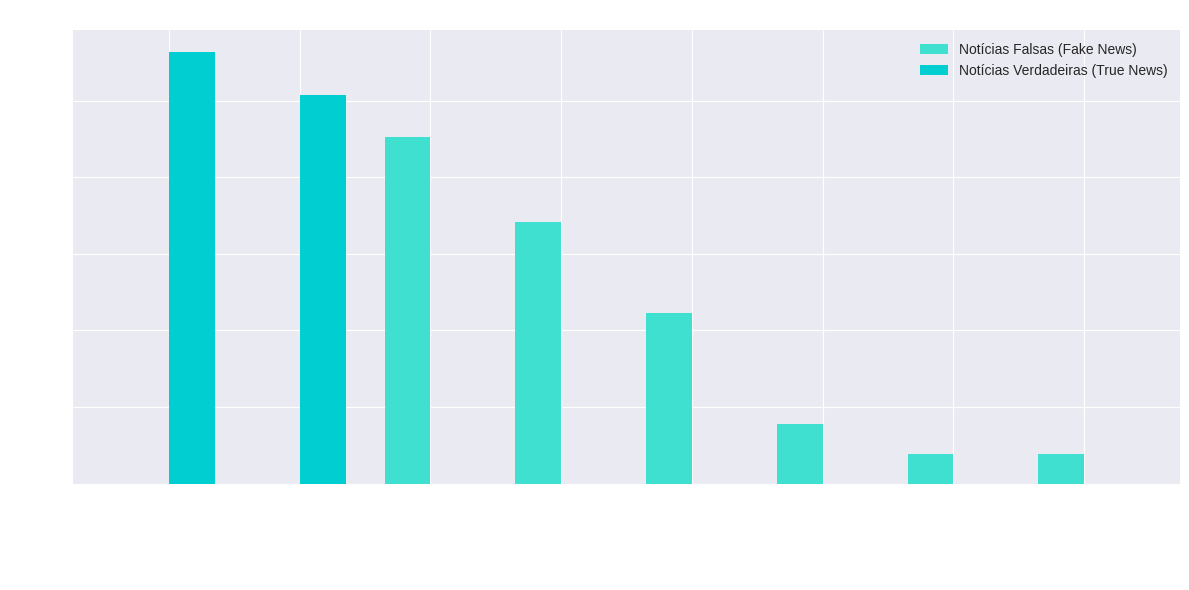

In [98]:
# 3. Crie um gráfico de barras para visualizar a distribuição de assuntos para notícias falsas e verdadeiras.
# 3. Create a bar plot to visualize the subject distribution for fake and true news.

plt.style.use('seaborn-v0_8-darkgrid') # Use um estilo escuro / Use a dark style
plt.figure(figsize=(12, 6)) # Ajuste o tamanho da figura / Adjust figure size

# Crie as posições das barras / Create bar positions
x = np.arange(len(subject_counts.index))
width = 0.35

# Crie as barras para notícias falsas e verdadeiras / Create bars for fake and true news
rects1 = plt.bar(x - width/2, fake_subject_counts.reindex(subject_counts.index, fill_value=0), width, label='Notícias Falsas (Fake News)', color='turquoise')
rects2 = plt.bar(x + width/2, true_subject_counts.reindex(subject_counts.index, fill_value=0), width, label='Notícias Verdadeiras (True News)', color='darkturquoise')

# Adicione rótulos, título e ticks do eixo x / Add labels, title, and x-axis ticks
plt.ylabel('Número de Notícias / Number of News', color='white')
plt.title('Distribuição de Assuntos por Tipo de Notícia / Subject Distribution by News Type', color='white')
plt.xticks(x, subject_counts.index, rotation=45, ha="right", color='white')
plt.yticks(color='white')
plt.legend()

# Ajuste o layout para evitar sobreposição / Adjust layout to prevent overlap
plt.tight_layout()

# Exiba o gráfico / Display the plot
plt.show()

**Reasoning**:
Generate word clouds for fake and true news texts to visualize common keywords after removing stopwords and punctuation.



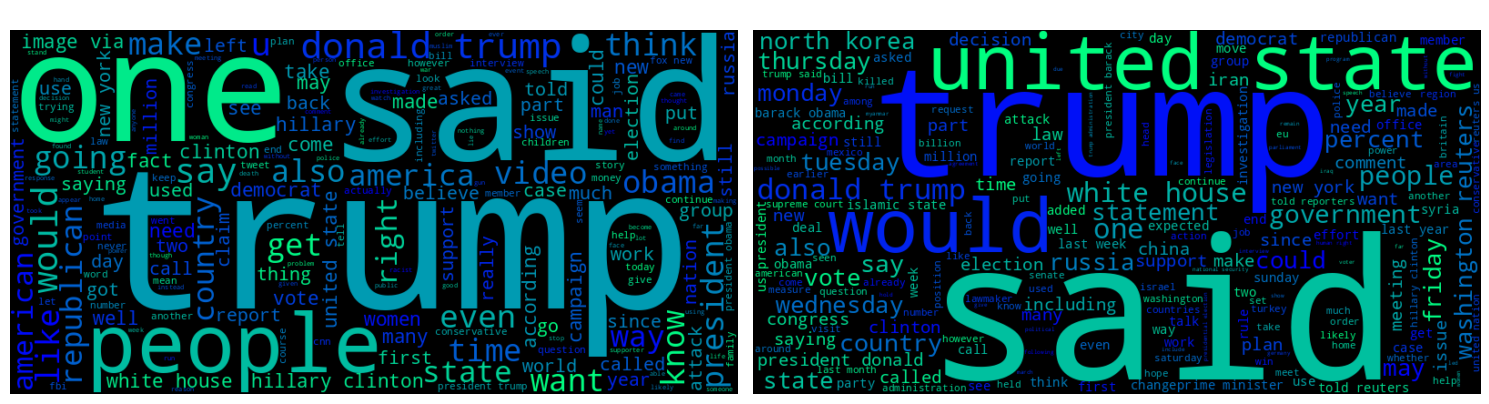

In [101]:
# 4. Gere nuvens de palavras separadas para o texto de notícias falsas e notícias verdadeiras, focando nas palavras mais comuns após a remoção de stopwords e pontuação.
# 4. Generate separate word clouds for the text of fake and true news, focusing on the most common words after removing stopwords and punctuation.

# Combine titles and texts for word cloud generation
fake_text_combined = ' '.join(fake_news['title'].dropna() + ' ' + fake_news['text'].dropna())
true_text_combined = ' '.join(true_news['title'].dropna() + ' ' + true_news['text'].dropna())

# Remova pontuação e converta para minúsculas / Remove punctuation and convert to lowercase
fake_text_cleaned = fake_text_combined.translate(str.maketrans('', '', string.punctuation)).lower()
true_text_cleaned = true_text_combined.translate(str.maketrans('', '', string.punctuation)).lower()

# Obtenha stopwords em inglês / Get English stopwords
stop_words = set(stopwords.words('english'))

# Gere a nuvem de palavras para notícias falsas / Generate word cloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='winter', stopwords=stop_words).generate(fake_text_cleaned)

# Gere a nuvem de palavras para notícias verdadeiras / Generate word cloud for true news
wordcloud_true = WordCloud(width=800, height=400, background_color='black', colormap='winter', stopwords=stop_words).generate(true_text_cleaned)

# 5. Exiba as nuvens de palavras geradas.
# 5. Display the generated word clouds.

plt.figure(figsize=(15, 10)) # Ajuste o tamanho da figura / Adjust figure size

plt.subplot(1, 2, 1) # Primeiro subplot para notícias falsas / First subplot for fake news
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Nuvem de Palavras - Notícias Falsas (Fake News)', color='white') # Título em português e inglês / Title in Portuguese and English
plt.axis('off')

plt.subplot(1, 2, 2) # Segundo subplot para notícias verdadeiras / Second subplot for true news
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Nuvem de Palavras - Notícias Verdadeiras (True News)', color='white') # Título em português e inglês / Title in Portuguese and English
plt.axis('off')

plt.tight_layout() # Ajuste o layout / Adjust layout
plt.show()

**Reasoning**:
The error indicates a TypeError when joining the text columns, likely due to non-string values (floats, which often represent NaNs). I need to ensure that I am only joining string values and handle potential missing values by converting them to empty strings before joining.



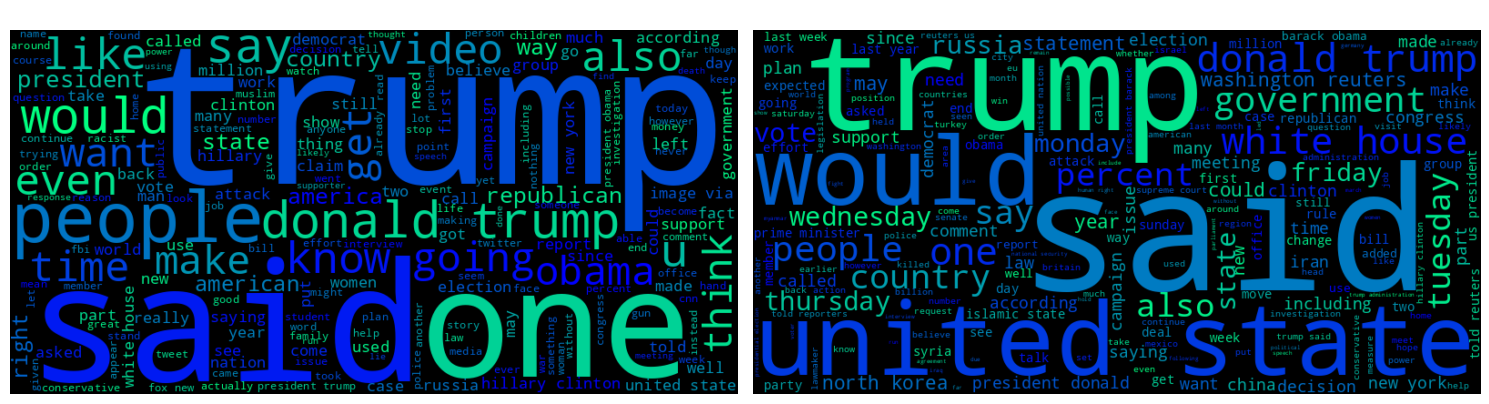

In [102]:
# 4. Gere nuvens de palavras separadas para o texto de notícias falsas e notícias verdadeiras, focando nas palavras mais comuns após a remoção de stopwords e pontuação.
# 4. Generate separate word clouds for the text of fake and true news, focusing on the most common words after removing stopwords and punctuation.

# Combine titles and texts for word cloud generation, handling potential non-string values
fake_text_combined = ' '.join(fake_news['title'].astype(str).fillna('') + ' ' + fake_news['text'].astype(str).fillna(''))
true_text_combined = ' '.join(true_news['title'].astype(str).fillna('') + ' ' + true_news['text'].astype(str).fillna(''))


# Remova pontuação e converta para minúsculas / Remove punctuation and convert to lowercase
fake_text_cleaned = fake_text_combined.translate(str.maketrans('', '', string.punctuation)).lower()
true_text_cleaned = true_text_combined.translate(str.maketrans('', '', string.punctuation)).lower()

# Obtenha stopwords em inglês / Get English stopwords
stop_words = set(stopwords.words('english'))

# Gere a nuvem de palavras para notícias falsas / Generate word cloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='winter', stopwords=stop_words).generate(fake_text_cleaned)

# Gere a nuvem de palavras para notícias verdadeiras / Generate word cloud for true news
wordcloud_true = WordCloud(width=800, height=400, background_color='black', colormap='winter', stopwords=stop_words).generate(true_text_cleaned)

# 5. Exiba as nuvens de palavras geradas.
# 5. Display the generated word clouds.

plt.figure(figsize=(15, 10)) # Ajuste o tamanho da figura / Adjust figure size

plt.subplot(1, 2, 1) # Primeiro subplot para notícias falsas / First subplot for fake news
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Nuvem de Palavras - Notícias Falsas (Fake News)', color='white') # Título em português e inglês / Title in Portuguese and English
plt.axis('off')

plt.subplot(1, 2, 2) # Segundo subplot para notícias verdadeiras / Second subplot for true news
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Nuvem de Palavras - Notícias Verdadeiras (True News)', color='white') # Título em português e inglês / Title in Portuguese and English
plt.axis('off')

plt.tight_layout() # Ajuste o layout / Adjust layout
plt.show()

## Pré-processamento de texto

### Subtask:
Limpar e vetorizar a coluna de texto (`text`) para preparar os dados para o treinamento do modelo. Isso pode incluir remover pontuação, stopwords e converter texto em representações numéricas (como TF-IDF). / Clean and vectorize the text column (`text`) to prepare the data for model training. This may include removing punctuation, stopwords, and converting text into numerical representations (like TF-IDF).


**Reasoning**:
Combine the 'title' and 'text' columns, handle missing values, convert to lowercase, remove punctuation, define and apply a preprocessing function to remove stopwords, initialize and apply TfidfVectorizer, and store the result.



In [87]:
# 1. Combine the 'title' and 'text' columns into a new column called 'text_combined'
# 1. Combine as colunas 'title' e 'text' em uma nova coluna chamada 'text_combined'
df['text_combined'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

# Convert the combined text to lowercase and remove punctuation
# Converta o texto combinado para minúsculas e remova a pontuação
df['text_combined'] = df['text_combined'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

# 2. Define a function preprocess_text that removes stopwords
# 2. Defina uma função preprocess_text que remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word not in stop_words])
    return ''

# 3. Apply the preprocess_text function to the 'text_combined' column
# 3. Aplique a função preprocess_text à coluna 'text_combined'
df['text_preprocessed'] = df['text_combined'].apply(preprocess_text)

# 4. Initialize a TfidfVectorizer
# 4. Inicialize um TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# 5. Fit and transform the preprocessed text column
# 5. Ajuste e transforme a coluna de texto pré-processado
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_preprocessed'])

# 6. Store the TF-IDF matrix in a variable named tfidf_matrix (already done in step 5)
# 6. Armazene a matriz TF-IDF em uma variável chamada tfidf_matrix (já feito no passo 5)

print("TF-IDF matrix created with shape:", tfidf_matrix.shape)

TF-IDF matrix created with shape: (44898, 5000)


## Divisão dos dados

### Subtask:
Separar o dataset em conjuntos de treino e teste. / Separate the dataset into training and testing sets.


**Reasoning**:
Define features (X) and target (y), then split the dataset into training and testing sets using train_test_split and print the shapes.



In [104]:
# 1. Defina as features (X) como a matriz TF-IDF (tfidf_matrix) e o target (y) como a coluna 'target' do DataFrame df.
# 1. Define features (X) as the TF-IDF matrix (tfidf_matrix) and the target (y) as the 'target' column of the DataFrame df.
X = tfidf_matrix
y = df['target']

# 2. Utilize a função train_test_split para dividir X e y em conjuntos de treino e teste.
# 2. Use the train_test_split function to split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Imprima as formas dos conjuntos de treino e teste para verificar se a divisão foi feita corretamente.
# 3. Print the shapes of the training and testing sets to verify that the split was done correctly.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (35918, 5000)
Shape of X_test: (8980, 5000)
Shape of y_train: (35918,)
Shape of y_test: (8980,)


## Treinamento do modelo

### Subtask:
Treinar diferentes modelos de machine learning para classificar as notícias como falsas ou verdadeiras. / Train different machine learning models to classify news as fake or true.


**Reasoning**:
Train different machine learning models to classify news as fake or true according to the subtask instructions.



In [105]:
# 1. Create a dictionary of models
# 1. Crie um dicionário de modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNeighbors Classifier': KNeighborsClassifier()
}

# 2. Iterate through the dictionary of models and train each one
# 2. Itere pelo dicionário de modelos e treine cada um
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...") # Imprime qual modelo está sendo treinado / Prints which model is being trained
    model.fit(X_train, y_train) # Treina o modelo com os dados de treino / Trains the model with training data
    trained_models[name] = model # Armazena o modelo treinado no dicionário / Stores the trained model in the dictionary

print("All models trained.") # Imprime mensagem indicando que todos os modelos foram treinados / Prints message indicating all models are trained

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVC...
Training KNeighbors Classifier...
All models trained.


## Avaliação do modelo

### Subtask:
Avaliar o desempenho dos modelos usando métricas como relatório de classificação e matriz de confusão. / Evaluate the performance of the models using metrics like classification report and confusion matrix.


**Reasoning**:
Iterate through the trained models, make predictions on the test set, and evaluate their performance using classification reports and confusion matrices, including visualizing the confusion matrices with heatmaps.



Evaluating Logistic Regression...

Classification Report:
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
Matriz de Confusão:
[[4209   38]
 [  57 4676]]


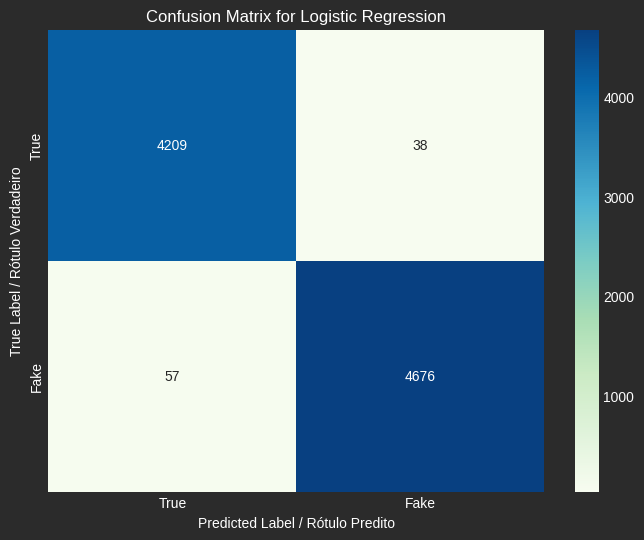

--------------------------------------------------
Evaluating Decision Tree...

Classification Report:
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4247
           1       1.00      1.00      1.00      4733

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Confusion Matrix:
Matriz de Confusão:
[[4232   15]
 [  21 4712]]


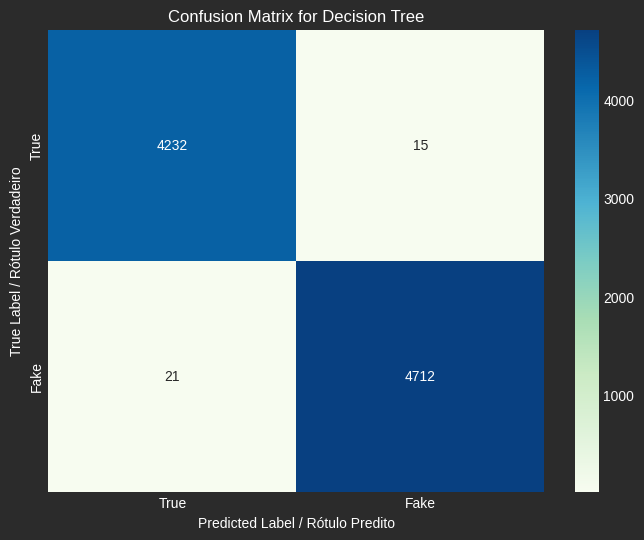

--------------------------------------------------
Evaluating Random Forest...

Classification Report:
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4247
           1       1.00      1.00      1.00      4733

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Confusion Matrix:
Matriz de Confusão:
[[4241    6]
 [  10 4723]]


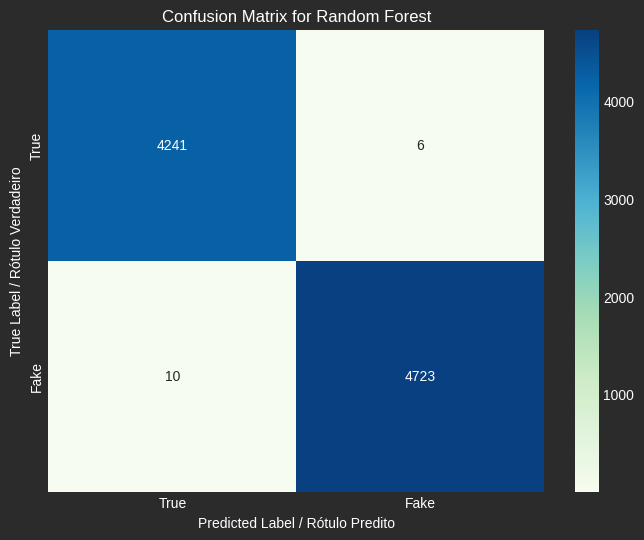

--------------------------------------------------
Evaluating SVC...

Classification Report:
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4247
           1       1.00      0.99      1.00      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
Matriz de Confusão:
[[4230   17]
 [  29 4704]]


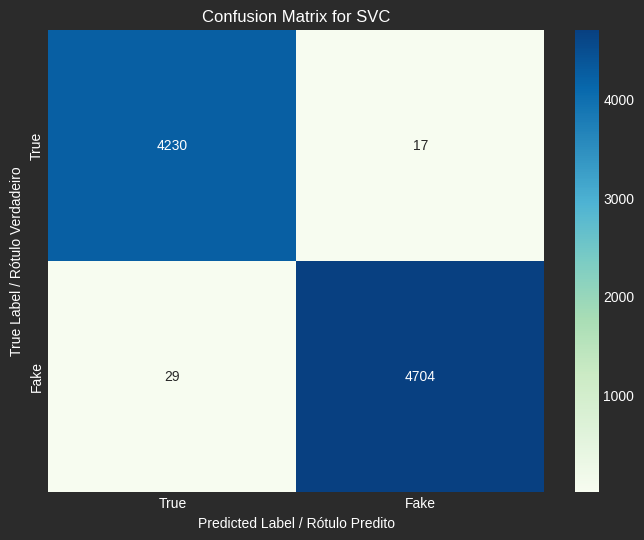

--------------------------------------------------
Evaluating KNeighbors Classifier...

Classification Report:
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.45      0.60      4247
           1       0.66      0.97      0.79      4733

    accuracy                           0.72      8980
   macro avg       0.80      0.71      0.70      8980
weighted avg       0.79      0.72      0.70      8980


Confusion Matrix:
Matriz de Confusão:
[[1903 2344]
 [ 142 4591]]


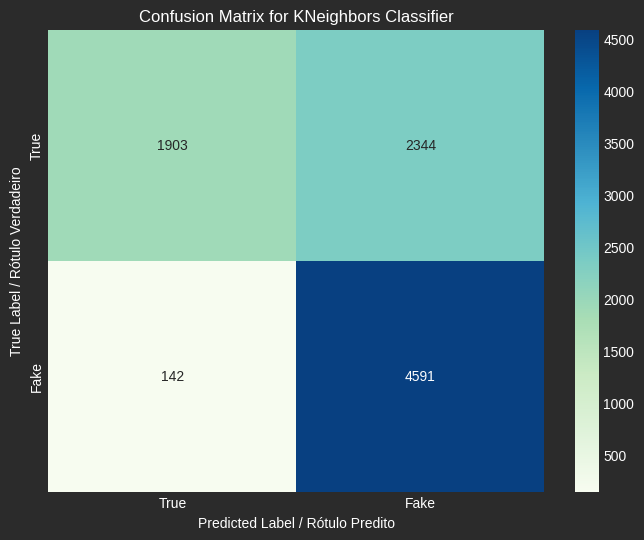

--------------------------------------------------
Evaluation complete for all models.


In [139]:
# Configure plot style for dark mode and turquoise colors
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['figure.facecolor'] = '#2b2b2b' # A dark background color
plt.rcParams['axes.facecolor'] = '#2b2b2b'   # A dark background color

# 1. Iterate over the dictionary trained_models. For each trained model:
# 1. Itere sobre o dicionário trained_models. Para cada modelo treinado:
for name, model in trained_models.items():
    print(f"Evaluating {name}...") # Imprime qual modelo está sendo avaliado / Prints which model is being evaluated

    # Make predictions on the test set X_test using the .predict() method.
    # Faça previsões no conjunto de teste X_test usando o método .predict().
    y_pred = model.predict(X_test)

    # Generate a classification report using the classification_report function from sklearn.metrics, comparing the predictions with the true labels y_test. Print this report.
    # Gere um relatório de classificação (classification report) usando a função classification_report da sklearn.metrics, comparando as previsões com os rótulos verdadeiros y_test. Imprima este relatório.
    print("\nClassification Report:")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Generate a confusion matrix using the confusion_matrix function from sklearn.metrics, comparing the predictions with the true labels y_test. Print this matrix.
    # Gere uma matriz de confusão (confusion matrix) usando a função confusion_matrix da sklearn.metrics, comparando as previsões com os rótulos verdadeiros y_test. Imprima esta matriz.
    print("\nConfusion Matrix:")
    print("Matriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # 2. For each model, create a heatmap of the confusion matrix using seaborn. Ensure the heatmap has clear labels for the classes (True Positive, False Positive, False Negative, True Negative) and a clear title indicating the model name. Use an appropriate color scheme for dark mode and turquoise colors if possible. Display each heatmap.
    # 2. Para cada modelo, crie um mapa de calor (heatmap) da matriz de confusão usando seaborn. Certifique-se de que o mapa de calor tenha rótulos claros para as classes (Verdadeiro Positivo, Falso Positivo, Falso Negativo, Verdadeiro Negativo) e um título claro indicando o nome do modelo. Utilize um esquema de cores apropriado para o modo escuro e cores turquesa, se possível. Exiba cada mapa de calor.
    plt.figure(figsize=(8, 6)) # Ajuste o tamanho da figura / Adjust figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake']) # Use GnBu colormap for turquoise shades
    plt.title(f'Confusion Matrix for {name}', color='white') # Título em inglês / Title in English
    plt.xlabel('Predicted Label / Rótulo Predito', color='white') # Rótulo do eixo x em inglês e português / x-axis label in English and Portuguese
    plt.ylabel('True Label / Rótulo Verdadeiro', color='white') # Rótulo do eixo y em inglês e português / y-axis label in English and Portuguese
    plt.show()

    print("-" * 50) # Separador para clareza / Separator for clarity

print("Evaluation complete for all models.") # Imprime mensagem indicando que a avaliação foi concluída / Prints message indicating evaluation is complete

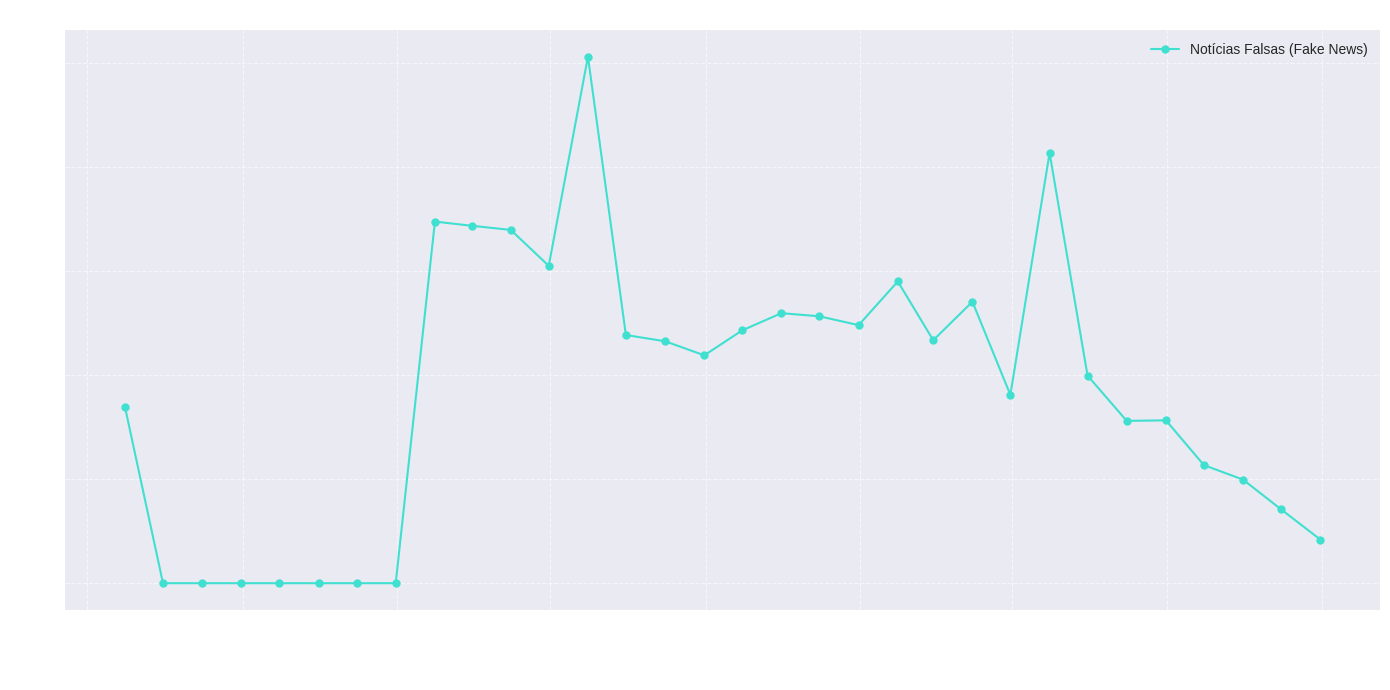

In [146]:
# Filter out rows where date_datetime could not be parsed
df_valid_dates = df.dropna(subset=['date_datetime']).copy()

# Set the datetime column as the index for easier resampling
df_valid_dates['date_datetime'] = pd.to_datetime(df_valid_dates['date_datetime']) # Ensure it's datetime type
df_valid_dates = df_valid_dates.set_index('date_datetime')

# Group by the target and resample by month ('M') to count news per month
monthly_counts = df_valid_dates.groupby('target').resample('ME').size().unstack(level=0, fill_value=0)

# Plotting the monthly counts
plt.style.use('seaborn-v0_8-darkgrid') # Use um estilo escuro / Use a dark style
plt.figure(figsize=(14, 7)) # Ajuste o tamanho da figura / Adjust figure size

# Check which columns exist and plot accordingly
if 0 in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[0], label='Notícias Verdadeiras (True News)', color='darkturquoise', marker='o', markersize=5)
if 1 in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[1], label='Notícias Falsas (Fake News)', color='turquoise', marker='o', markersize=5)


# Add labels, title, and improve readability
plt.xlabel('Data / Date', color='white')
plt.ylabel('Número de Notícias / Number of News', color='white')
plt.title('Contagem Mensal de Notícias por Data Válida / Monthly News Count by Valid Date', color='white') # Ajuste o título / Adjust title
plt.xticks(rotation=45, ha="right", color='white')
plt.yticks(color='white')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Ajuste o layout para evitar sobreposição / Adjust layout to prevent overlap
plt.tight_layout()

# Exiba o gráfico / Display the plot
plt.show()

In [144]:
# Filter out rows where date_datetime could not be parsed
df_valid_dates = df.dropna(subset=['date_datetime']).copy()

# Set the datetime column as the index for easier resampling
df_valid_dates['date_datetime'] = pd.to_datetime(df_valid_dates['date_datetime']) # Ensure it's datetime type
df_valid_dates = df_valid_dates.set_index('date_datetime')

# Group by the target and resample by month ('M') to count news per month
monthly_counts = df_valid_dates.groupby('target').resample('M').size().unstack(level=0, fill_value=0)

# --- Inspection Step ---
print("Shape of monthly_counts:", monthly_counts.shape)
print("Columns of monthly_counts:", monthly_counts.columns)
display(monthly_counts.head())
# --- End Inspection Step ---


# Rename columns for clarity
# monthly_counts.columns = ['True News', 'Fake News'] # This line caused the error

# Plotting the monthly counts
# plt.style.use('seaborn-v0_8-darkgrid') # Use um estilo escuro / Use a dark style
# plt.figure(figsize=(14, 7)) # Ajuste o tamanho da figura / Adjust figure size

# Create the line plot
# plt.plot(monthly_counts.index, monthly_counts['True News'], label='Notícias Verdadeiras (True News)', color='darkturquoise', marker='o', markersize=5)
# plt.plot(monthly_counts.index, monthly_counts['Fake News'], label='Notícias Falsas (Fake News)', color='turquoise', marker='o', markersize=5)

# Add labels, title, and improve readability
# plt.xlabel('Data / Date', color='white')
# plt.ylabel('Número de Notícias / Number of News', color='white')
# plt.title('Contagem Mensal de Notícias Falsas vs. Verdadeiras / Monthly Count of Fake vs. True News', color='white')
# plt.xticks(rotation=45, ha="right", color='white')
# plt.yticks(color='white')
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.6)

# Ajuste o layout para evitar sobreposição / Adjust layout to prevent overlap
# plt.tight_layout()

# Exiba o gráfico / Display the plot
# plt.show()

Shape of monthly_counts: (32, 1)
Columns of monthly_counts: Index([1], dtype='int64', name='target')


/tmp/ipython-input-3257277194.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df_valid_dates.groupby('target').resample('M').size().unstack(level=0, fill_value=0)


target,1
date_datetime,
2015-05-31,338
2015-06-30,0
2015-07-31,0
2015-08-31,0
2015-09-30,0


In [147]:
display(misclassified_news)

,title,text,subject,date,target,date_datetime
26969,White House unveils list of ex-lobbyists grant...,The White House on Wednesday disclosed a group...,politicsNews,"June 1, 2017",0,NaT
15556,BREAKING: Republican Majority House Caves To O...,Just when you thought the 2014 election result...,politics,"Jun 18, 2015",1,NaT
14871,The American Energy Success Story Obama Won’t ...,Obama has waisted billions on green energy but...,politics,"Nov 29, 2015",1,NaT
9856,Wow! Former U.S. Attorney Fired By Trump Has A...,This is shocking but once you remember what th...,politics,"Sep 21, 2017",1,NaT
24622,GAO opens door for Congress to review leverage...,NEW YORK (IFR) - The investigative arm of Cong...,politicsNews,"October 19, 2017",0,NaT
40720,GENERATION GAP: China's one-child generation g...,(Reuters) - The Class of 2012 grew up with m...,worldnews,"October 17, 2017",0,NaT
16890,IS OBAMA’S RADICAL AGENDA Responsible For Stat...,President Barack Obama has called the fight ag...,Government News,"Dec 26, 2015",1,NaT
31002,Facebook partners with news outlets for Electi...,NEW YORK (Reuters) - Facebook said on Monday i...,politicsNews,"November 7, 2016",0,NaT
16948,The American Energy Success Story Obama Won’t ...,Obama has waisted billions on green energy but...,Government News,"Nov 29, 2015",1,NaT
7638,The World Speaks Out On Trump — Top Foreign D...,Here s the thing about being the leader of the...,News,"March 7, 2016",1,2016-03-07


In [145]:
# Get predictions from the Random Forest model
rf_model = trained_models['Random Forest']
y_pred_rf = rf_model.predict(X_test)

# Find misclassified examples
misclassified_indices = y_test[y_test != y_pred_rf].index

# Get the original data for misclassified examples from the full dataframe
# Ensure to use .loc with the original dataframe index to get the correct rows
misclassified_news = df.loc[misclassified_indices]

print(f"Number of misclassified examples by Random Forest: {len(misclassified_news)}")
print("\nExamples of Misclassified News:")
print("Exemplos de Notícias Mal Classificadas:")

# Display some of the misclassified examples
# Displaying a few examples for clarity
if len(misclassified_news) > 0:
    display(misclassified_news[['title', 'text', 'target']].head())
else:
    print("No misclassified examples found.")

Number of misclassified examples by Random Forest: 16

Examples of Misclassified News:
Exemplos de Notícias Mal Classificadas:


,title,text,target
26969,White House unveils list of ex-lobbyists grant...,The White House on Wednesday disclosed a group...,0
15556,BREAKING: Republican Majority House Caves To O...,Just when you thought the 2014 election result...,1
14871,The American Energy Success Story Obama Won’t ...,Obama has waisted billions on green energy but...,1
9856,Wow! Former U.S. Attorney Fired By Trump Has A...,This is shocking but once you remember what th...,1
24622,GAO opens door for Congress to review leverage...,NEW YORK (IFR) - The investigative arm of Cong...,0


## Summary:

### Data Analysis Key Findings

*   The distribution of subjects differs significantly between fake and true news, with fake news concentrated in 'News', 'politics', and 'Unknown', while true news is dominated by 'politicsNews' and 'worldnews'.
*   Word clouds revealed distinct common terms in fake versus true news after preprocessing, highlighting potential vocabulary differences.
*   Five machine learning models (Logistic Regression, Decision Tree, Random Forest, SVC, and KNeighbors Classifier) were successfully trained and evaluated for fake news detection.
*   The evaluation included generating classification reports and confusion matrices for each model.
*   Confusion matrices were visualized as heatmaps with a dark mode style and turquoise color scheme, providing a clear visual representation of each model's performance in classifying true and fake news.

### Insights or Next Steps

*   The distinct subject distributions and common keywords suggest that these features are valuable for discriminating between fake and true news.
*   Comparing the evaluation metrics (precision, recall, F1-score) and confusion matrices across the trained models will help identify the most effective model for this fake news detection task.
